In [2]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv('HR_comma_sep.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 1. **Check if DATA has any missing values**

In [7]:
data.isnull().values.any() #data has no null values else the output would have had ben true

False

# 2.**Understand what factors contributed most to employee turnover at EDA**

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

2.1 - Heatmap for corelation between all the numerical data

In [10]:
data_corr=data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]

<Axes: >

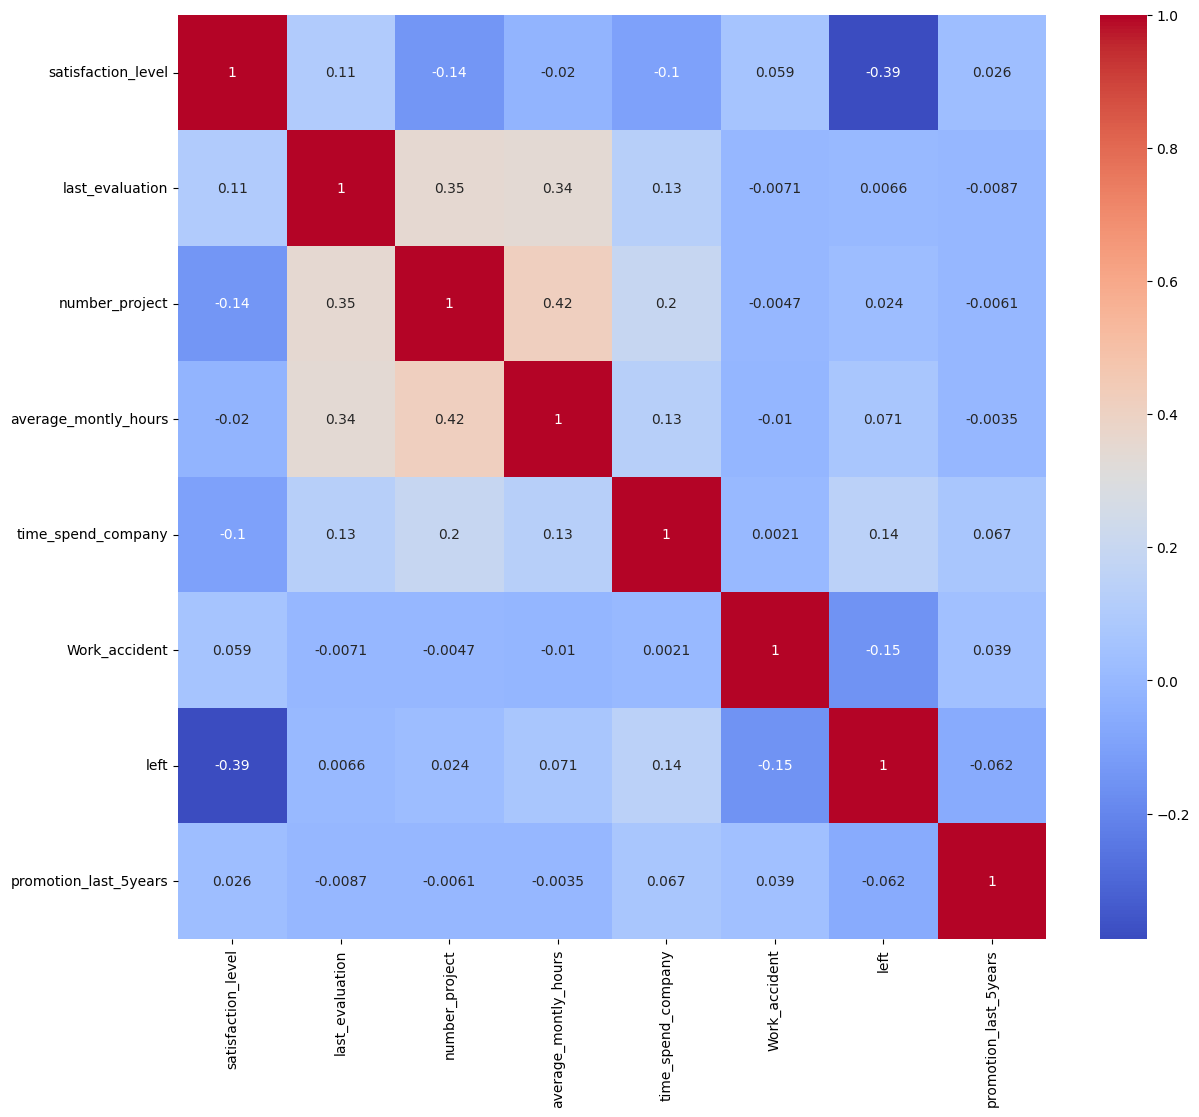

In [11]:
plt.figure(figsize=(14,12))
sns.heatmap(data_corr.corr(),annot=True,cmap='coolwarm')

2.2 -Draw the Distribution Plot

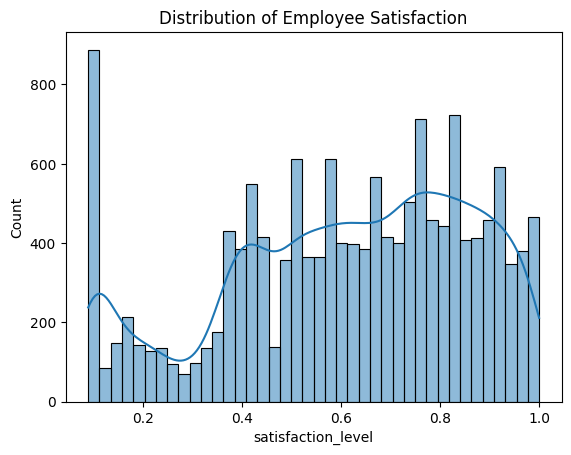

In [12]:
#Employee Satisfaction
sns.histplot(data['satisfaction_level'], kde=True,bins=40)
plt.title('Distribution of Employee Satisfaction')
plt.show()

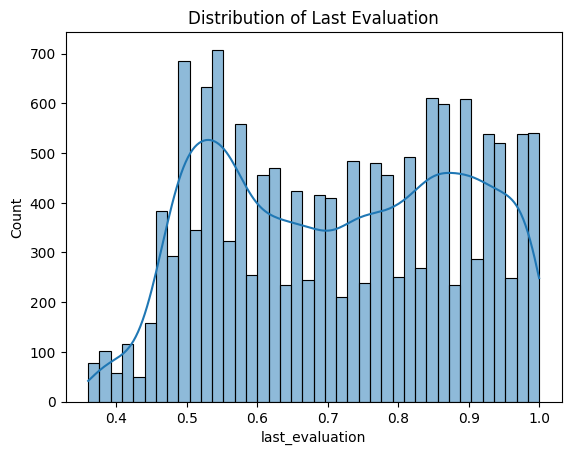

In [13]:
#last_evaluation distribution
sns.histplot(data['last_evaluation'], kde=True,bins=40)
plt.title('Distribution of Last Evaluation')
plt.show()

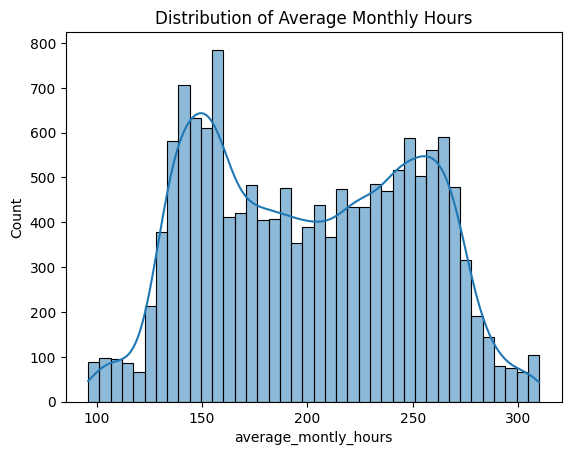

In [14]:
#average_montly_hours distribution
sns.histplot(data['average_montly_hours'], kde=True,bins=40)
plt.title('Distribution of Average Monthly Hours')
plt.show()

**2.3** Histogram plot of number_project and employees left/stayed

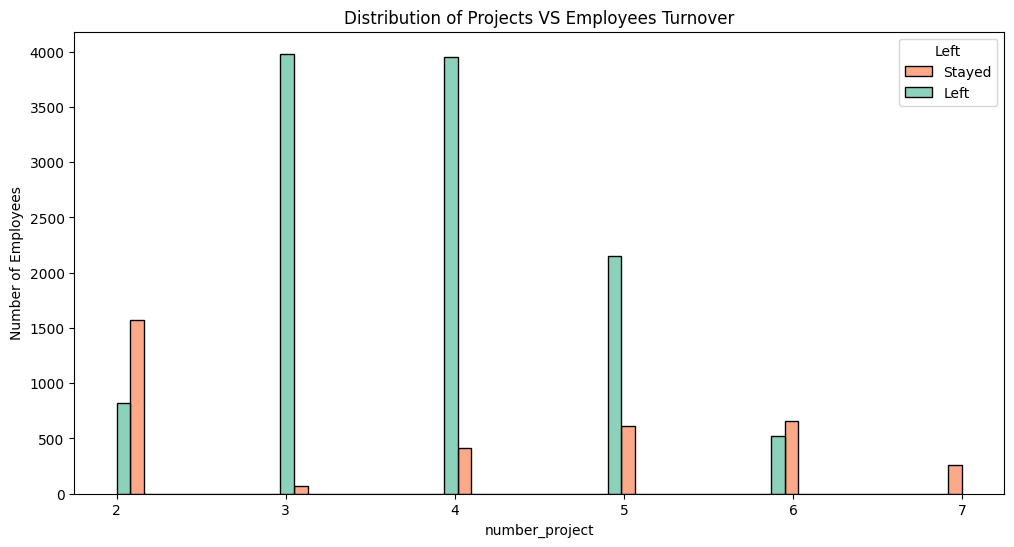

In [29]:
#2.3
plt.figure(figsize=(12, 6))
sns.histplot(x='number_project', hue='left',data=data, palette='Set2',multiple="dodge")
plt.title('Distribution of Projects VS Employees Turnover')
plt.ylabel('Number of Employees')
plt.legend(title='Left', loc='upper right', labels=['Stayed', 'Left'])
plt.show()

INFERENCES
1. The people with less number ofprojects were among the most to leave, implying the notion among most of the employess that more projects would mean more learning.

2. The count tells us about the general work scnearion where few employees opt for work balance while few devote themselves completely to the work. Example the people with most number of projects didn't seem to leave as they  are either the people who are staisfied with the belief mentioned in point 1 or are either the ones who priortize work over everything.

3. Also it can be inferred from data that the employess in the middle tier are more tend to leave the organization, compared to the ones with the least and most number of projects.

**3. CLUSTERING**

In [30]:
from sklearn.cluster import KMeans

In [36]:
data_left = data[data['left'] == 1]
Clustering_data = data_left[['satisfaction_level', 'last_evaluation']]

In [37]:
kmeans = KMeans(n_clusters=3, random_state=0)
data_left['cluster'] = kmeans.fit_predict(Clustering_data)

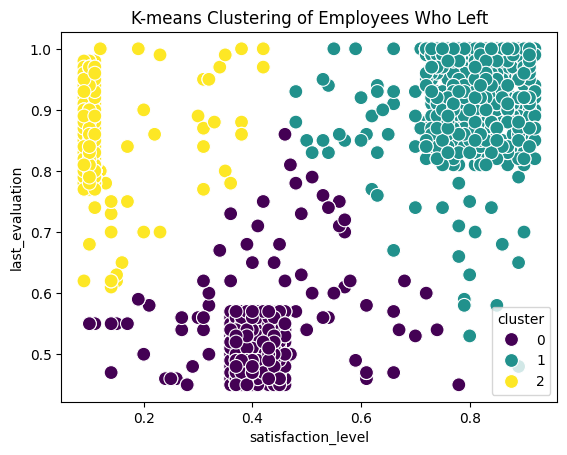

In [39]:
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=data_left, palette='viridis', s=100)
plt.title('K-means Clustering of Employees Who Left')
plt.show()

**INFERENCE**
1. The employess who were very satisfied with higher evaluation scores were amongst the most to leave
2. The employees with medium satisfaction level and lower evaluation scores were the second biggest group to leave the company.
3. Whilethe smalles grop was of people who had high evaluation score but very low satisfaction leval.

Over all it can be inferred that the first group would be of people who were good at job and were staisfied but left for some reason and can be considered as normal attrition portion. While if we say the first group as outlier then the other two groups definetly tell us that evaluation score matters the most for employees leaving the company.

# **4. HANDLING THE LEFT CLASS IMBALANCE USING SMOTE TECHINQUE**

In [40]:
data = pd.get_dummies(data, columns=['sales', 'salary'], drop_first=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales_RandD            14999 non-null  bool   
 9   sales_accounting       14999 non-null  bool   
 10  sales_hr               14999 non-null  bool   
 11  sales_management       14999 non-null  bool   
 12  sales_marketing        14999 non-null  bool   
 13  sales_product_mng      14999 non-null  bool   
 14  sales_sales            14999 non-null  bool   
 15  sa

In [42]:
from sklearn.model_selection import train_test_split

Feature = data.drop('left',axis=1)
Label = data['left']

X_train, X_test, y_train, y_test = train_test_split(Feature, Label, test_size=0.2, random_state=123)

**SMOTE UNSAMPLING**


In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
sm = SMOTE(random_state=123)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

# **5. 5 FOLD CROSS VALIDATION**

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report

In [62]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}
predictions = {}
probs = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)
    probs[model_name] = model.predict_proba(X_test)[:, 1]
    print(f'{model_name} ROC AUC Score: {roc_auc_score(y_test, probs[model_name])}')
    trainScore = model.score(X_train,y_train)
    testScore = model.score(X_test,y_test)
    kfold = KFold(n_splits=5, shuffle=True, random_state=123)
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    y_pred = model.predict(X_test)
    cr = classification_report(y_test, y_pred)
    print(cr)
    print(f"trainScore for {model_name} is ",trainScore)
    print(f"testScore for {model_name} is ",testScore)
    print(f"Cross Validation Scores for {model_name} is ",scores)
    print()
    print()

Logistic Regression ROC AUC Score: 0.8083042801321663
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2291
           1       0.63      0.39      0.48       709

    accuracy                           0.80      3000
   macro avg       0.73      0.66      0.68      3000
weighted avg       0.78      0.80      0.78      3000

trainScore for Logistic Regression is  0.8054837903158597
testScore for Logistic Regression is  0.801
Cross Validation Scores for Logistic Regression is  [0.8        0.78916667 0.81291667 0.79583333 0.8036682 ]


Random Forest ROC AUC Score: 0.9945521784821824
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2291
           1       0.99      0.97      0.98       709

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

trainScore for Random Forest is

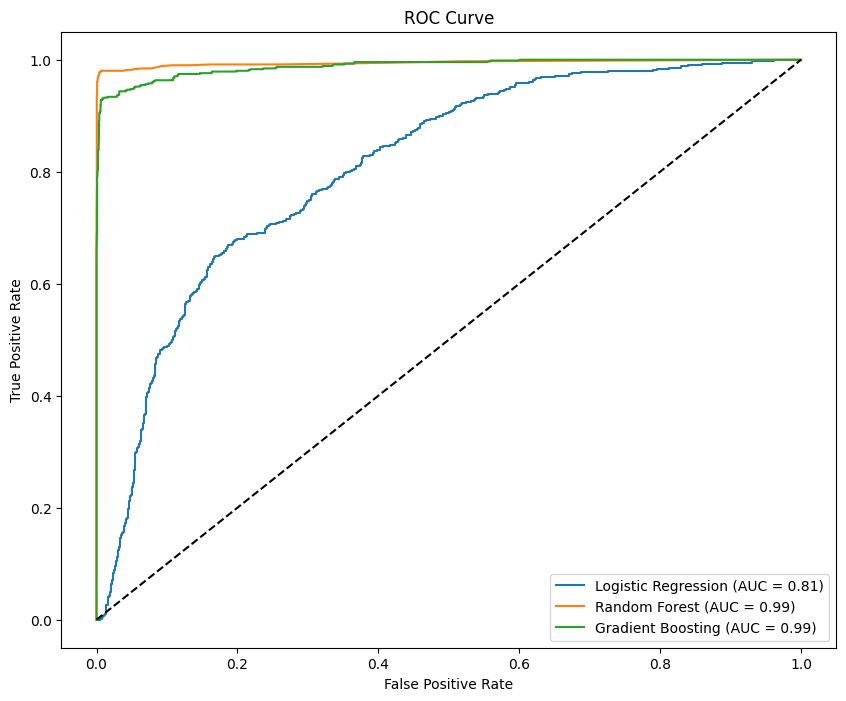

In [63]:
plt.figure(figsize=(10, 8))

for model_name in models:
    fpr, tpr, _ = roc_curve(y_test, probs[model_name])
    auc = roc_auc_score(y_test, probs[model_name])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

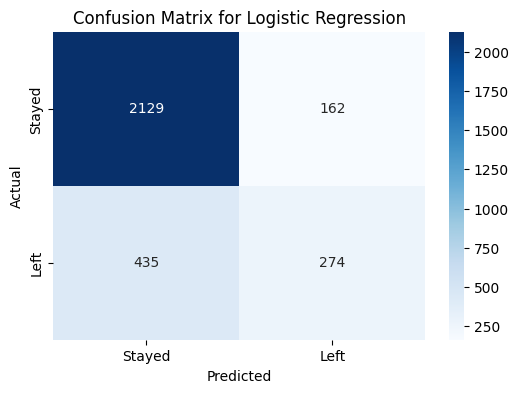

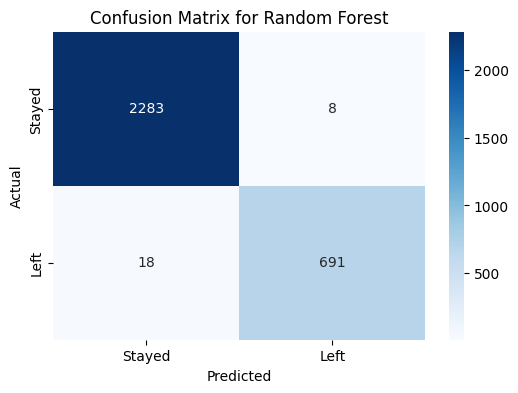

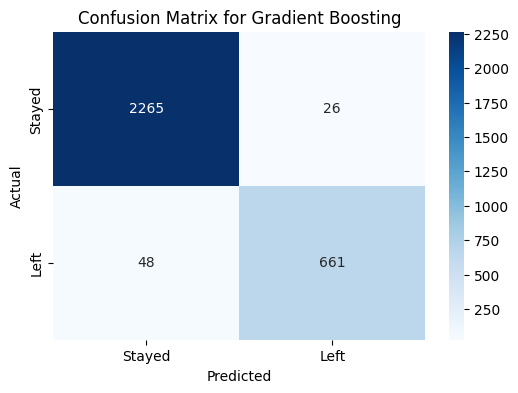

In [64]:
for model_name in models:
    cm = confusion_matrix(y_test, predictions[model_name])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

**In this case, we would want to reduce the number of false negatives, as it is more costly to predict an employee will stay when they actually leave.
Therefore, recall would be the more important metric to focus on.**

In [65]:
best_model = models['Gradient Boosting']  # Assuming Gradient Boosting is the best model
y_test_prob = best_model.predict_proba(X_test)[:, 1]

df_test = X_test.copy()
df_test['left_prob'] = y_test_prob

In [66]:
def retention_strategy(prob):
    if prob < 0.20:
        return 'Safe Zone (Green)'
    elif prob < 0.60:
        return 'Low-Risk Zone (Yellow)'
    elif prob < 0.90:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

df_test['retention_zone'] = df_test['left_prob'].apply(retention_strategy)

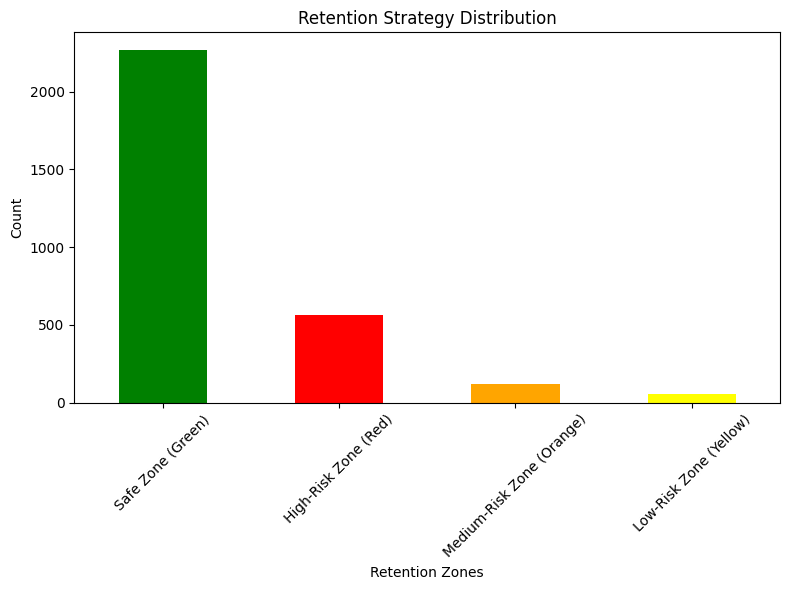

In [67]:
zone_counts = df_test['retention_zone'].value_counts()
# Plotting
plt.figure(figsize=(8, 6))
zone_counts.plot(kind='bar', color=['green', 'red', 'orange', 'yellow'])
plt.title('Retention Strategy Distribution')
plt.xlabel('Retention Zones')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()